In [52]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.cit import chisq, fisherz, kci, gsq
from causallearn.utils.GraphUtils import GraphUtils
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import io

In [55]:
df = pd.read_csv("../data/processed/adult_reweight.csv")

In [41]:
df = pd.read_csv("../data/processed/adult.csv")

In [51]:
df.to_csv("../data/processed/adult.csv")

In [45]:
df = df.rename(columns={"Income Binary":"income"})

In [47]:
df = df.rename(columns={"income":"INCOME"})

In [30]:
df.to_csv("../data/processed/adult_adv_debias.csv")

In [48]:
df = df.rename(columns={"marital-status":"marital"})

In [49]:
df = df.rename(columns={"hours-per-week":"hours"})

In [56]:
cg = pc(df.values, alpha=0.05, indep_test = gsq)
nodes = cg.G.get_nodes()
node_names = df.columns
nodes_dict = {}
for name, node in zip(node_names, nodes):
    nodes_dict[name] = node

  0%|          | 0/7 [00:00<?, ?it/s]

In [59]:
# define tiers
bk = BackgroundKnowledge() \
    .add_node_to_tier(nodes_dict['Age'], 1) \
    .add_node_to_tier(nodes_dict['sex'], 1) \
    .add_node_to_tier(nodes_dict['Education'], 2) \
    .add_node_to_tier(nodes_dict['marital'], 2) \
    .add_node_to_tier(nodes_dict['workclass'], 3) \
    .add_node_to_tier(nodes_dict['hour'], 3) \
    .add_node_to_tier(nodes_dict['INCOME'], 3)

# update graph with background knowledge
cg_with_bk = pc(df.values, alpha=0.05, indep_test = gsq, background_knowledge=bk)

  0%|          | 0/7 [00:00<?, ?it/s]

In [31]:
df.columns

Index(['sex', 'hours', 'INCOME', 'workclass', 'marital', 'Education', 'Age'], dtype='object')

['Sex',
 'Hours-per-week',
 'Income',
 'Workclass',
 'Marital Status',
 'Education',
 'Age']

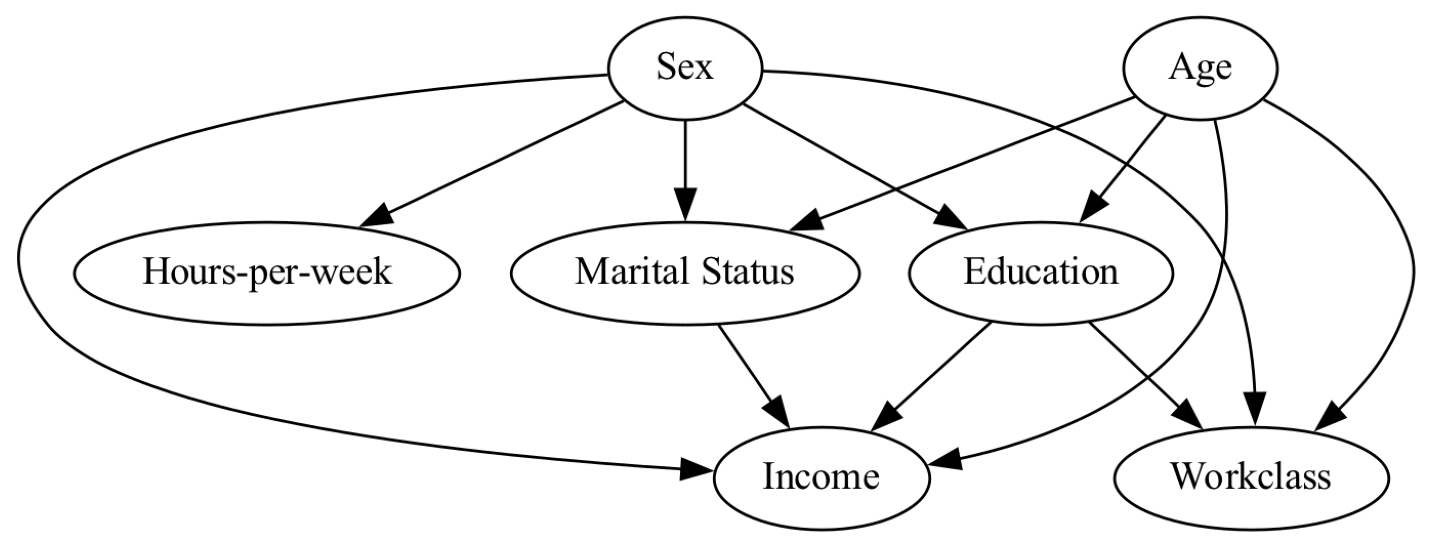

In [60]:
# visualization using pydot
cg_with_bk.draw_pydot_graph(labels = ['Sex', 'Hours-per-week', 'Income', 'Workclass', 'Marital Status', 'Education', 'Age'])